In [1]:
# 패키지 및 데이터 불러오기
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


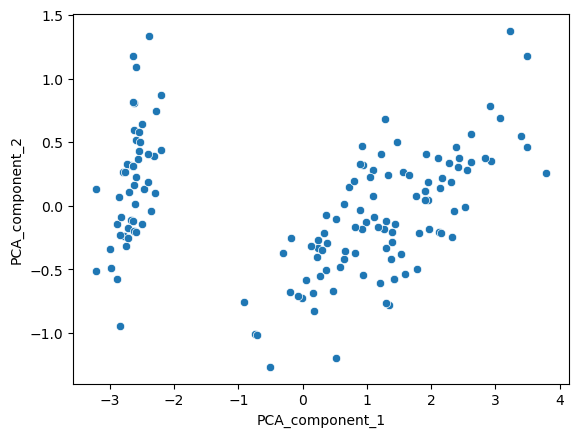

In [3]:
# PCA 차원축소
iris_pca = pca.fit_transform(iris.iloc[:,:-1]) # 마지막 열 빼고 모두 선택
iris_pca_df = pd.DataFrame(iris_pca, columns=['PCA_component_1','PCA_component_2'])

# 시각화
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2')
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


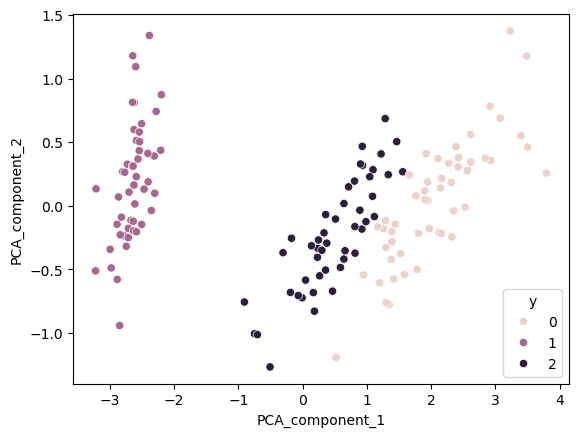

In [4]:
# GMM 클러스터링
gmm = GaussianMixture(n_components=3, random_state=12345)
gmm_y = gmm.fit_predict(iris_pca_df)

# GMM 클러스터링 결과 시각화
iris_pca_df['y'] = gmm_y
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2', hue='y')
plt.show()

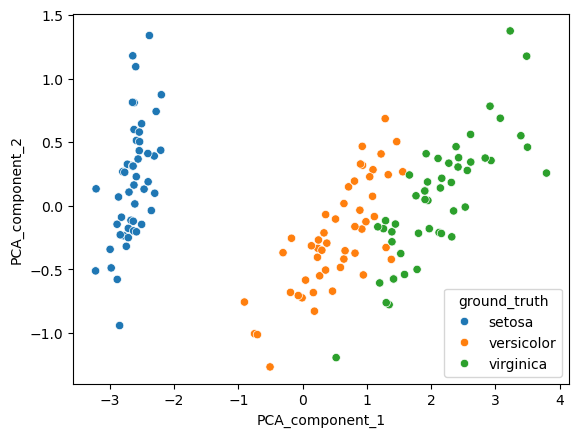

In [5]:
# species 정보 시각화
iris_pca_df['ground_truth'] = iris['species']
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2', hue='ground_truth')
plt.show()
